# Translation statistics
In this notebook we will check statistics related to the translation generated for QALD9-ES, and compare them with the original translations of QALD9.

First let's import the translations:

In [3]:
import pandas as pd

test_set = pd.read_excel('../Review files/qald9_test_set_review_table.xlsx')
train_set = pd.read_excel('../Review files/qald9_train_set_review_table.xlsx')

## Original QALD9 translations statistics
While translating, the translator classified each original translation under seven cases (not necessarily exclusive):
- Case 1: Minor translation mistakes within the question or keywords
- Case 2: Issues with entity proper names translation within the question or the keywords
- Case 3: Major translation errors in the question
- Case 4: Wrong translation of question keywords
- Case 5: Lack of ortographic accent within the question or the keywords
- Case 6: Correct translation of the question that requires modification to be more natural
- Case 7: Correct translation of the question that doesn't require modification

Let's check how many of each case were found.

In [8]:
train_set.count()

id                    408
en_question           408
es_question           385
native_translation    408
en_keywords           408
es_keywords           405
native_keywords       406
Case 1                 55
Case 2                 45
Case 3                 57
Case 4                216
Case 5                101
Case 6                125
Case 7                133
dtype: int64

In [9]:
test_set.count()

id                    150
en_question           150
es_question           150
native_translation    150
en_keywords           150
es_keywords           150
native_keywords       149
Case 1                 19
Case 2                 18
Case 3                 16
Case 4                 85
Case 5                 42
Case 6                 44
Case 7                 55
dtype: int64

We came to the following conclusions:
- The training dataset contains 408 questions where 133 had correct question translations (case 7), 125 questions had correct translations that were modified in order to be more natural (case 6), 101 of the questions had mistakes related to ortographic accents within the question string or the question keywords (case 5), 216 questions required modifications within their key words (case 4), 57 questions had major translation issues where 23 didn't have a translation and 34 had poor translations where the question lost its original meaning (case 3), in 45 questions there were problems with the translation of proper names within the question string or the keywords (case 2), and 55 questions had minor translation mistakes within the question string or keywords (case 1).
- The testing dataset contains 150 questions where 55 had correct question translations (case 7), 44 questions had correct translations that were modified in order to be more natural (case 6), 42 of the questions had mistakes related to ortographic accents within the question string or the question keywords (case 5), 85 questions required modifications within their key words (case 4), 16 questions had major translation issues, poor translations where the question lost its original meaning (case 3), in 18 questions there were problems with the translation of proper names within the question string or the keywords (case 2), and 19 questions had minor translation mistakes within the question string or keywords (case 1).

In total from 558 questions we'vefound 74 questions relatedto case 1, 63 questions related to case 2, 73 questions related to case 3, 301 questions related to case 4, 143 questions related to case 5, 169 questions related to case 6 and 188 questions related to case  7.

From this information we've generated the following plots:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
train_cases = dict(train_set.count())
train_cases['no_translation'] = train_cases.get('en_question') - train_cases.get('es_question')

test_cases = dict(test_set.count())
test_cases['no_translation'] = test_cases.get('en_question') - test_cases.get('es_question')

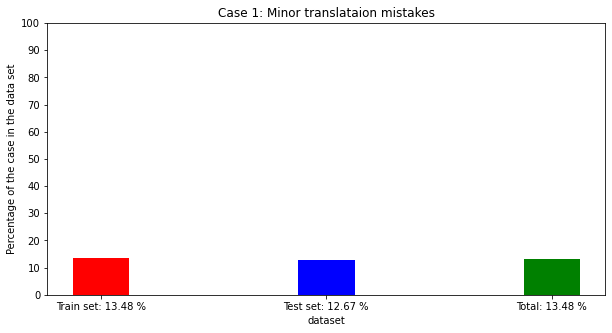

In [95]:
# Case 1

def plot_case(case, train_cases, test_cases, title):

    case_y = [ round( train_cases.get(case) / train_cases.get('en_question') *100 ,2),
               round( test_cases.get(case) / test_cases.get('en_question') *100 ,2),
              round( (train_cases.get(case) + test_cases.get('Case 1') ) / (train_cases.get('en_question') + test_cases.get('en_question'))*100 ,2)]

    case_x = ['Train set: ' + str(case_y[0]) + ' %', 'Test set: ' + str(case_y[1]) + ' %', 'Total: ' + str(case_y[0]) + ' %']
    fig = plt.figure(figsize = (10, 5))
    plt.bar(case_x, case_y, color =['red', 'blue', 'green'],
        width = 0.25)
    plt.ylim([0, 100])
    plt.yticks([0,10,20,30,40,50,60,70,80,90, 100])
    plt.xlabel("dataset")
    plt.ylabel("Percentage of the case in the data set")
    plt.title(title)
    plt.show()
    
    
plot_case('Case 1', train_cases, test_cases, 'Case 1: Minor translataion mistakes')

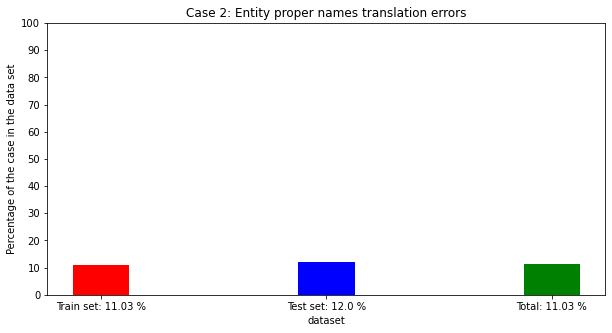

In [96]:
plot_case('Case 2', train_cases, test_cases, 'Case 2: Entity proper names translation errors')

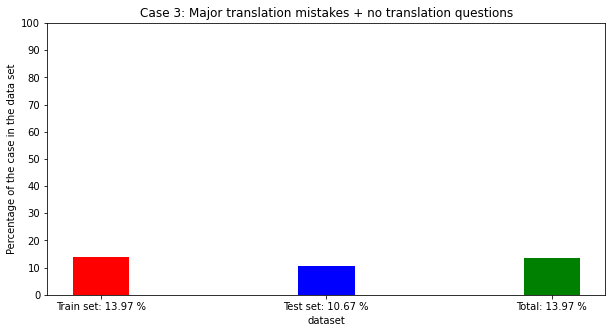

In [97]:
plot_case('Case 3', train_cases, test_cases, 'Case 3: Major translation mistakes + no translation questions')

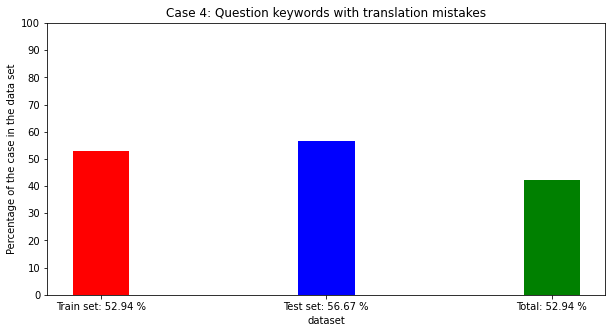

In [98]:
plot_case('Case 4', train_cases, test_cases, 'Case 4: Question keywords with translation mistakes')

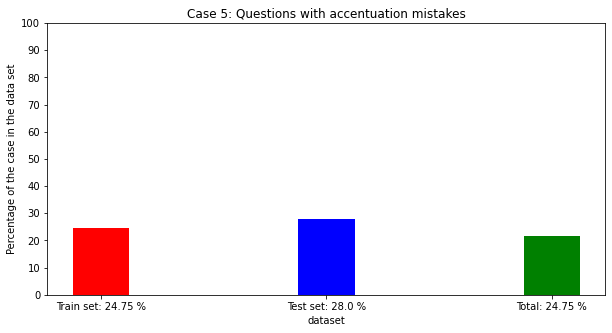

In [99]:

plot_case('Case 5', train_cases, test_cases, 'Case 5: Questions with accentuation mistakes')

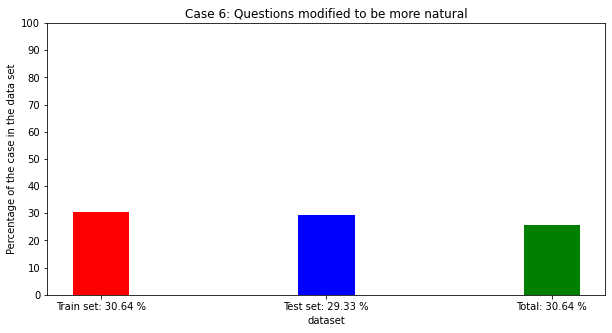

In [100]:
plot_case('Case 6', train_cases, test_cases, 'Case 6: Questions modified to be more natural')

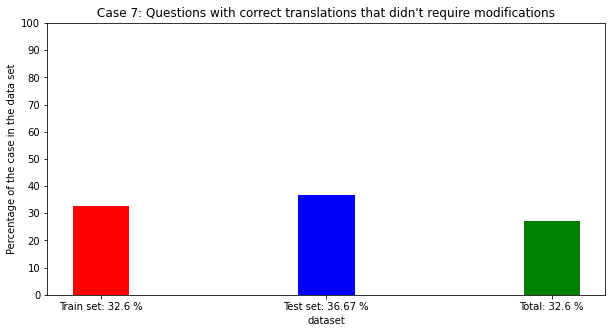

In [101]:
plot_case('Case 7', train_cases, test_cases, 'Case 7: Questions with correct translations that didn\'t require modifications')

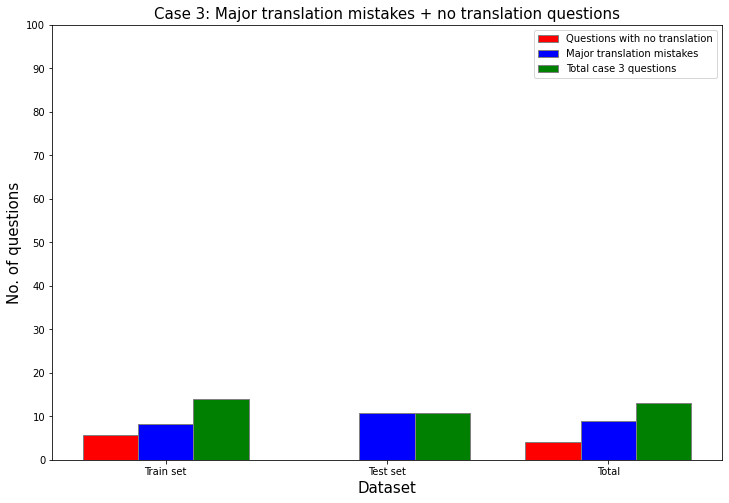

In [102]:
# Case 3
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
train_no_translataion = train_cases.get('en_question') - train_cases.get('es_question')
test_no_translataion = test_cases.get('en_question') - test_cases.get('es_question')
total_no_translataion = train_no_translataion + test_no_translataion

per_train_no_translataion = round(train_no_translataion / train_cases.get('en_question') *100, 2)
per_test_no_translataion = round(test_no_translataion / test_cases.get('en_question') *100, 2)
per_total_no_translation = round( total_no_translataion/(train_cases.get('en_question') + test_cases.get('en_question'))*100,2)

not_transltion = [ per_train_no_translataion, per_test_no_translataion, per_total_no_translation ]

train_misstranslation = train_cases.get('Case 3') - train_no_translataion
test_misstranslation = test_cases.get('Case 3') - test_no_translataion
total_misstranslation = train_misstranslation + test_misstranslation

per_train_misstranslation = round(train_misstranslation / train_cases.get('en_question') *100, 2)
per_test_misstranslation = round(test_misstranslation / test_cases.get('en_question') *100, 2)
per_total_misstranslation = round( total_misstranslation/(train_cases.get('en_question') + test_cases.get('en_question'))*100,2)

miss_translation = [ per_train_misstranslation, per_test_misstranslation, per_total_misstranslation ]

total_train = round(train_cases.get('Case 3') / (train_cases.get('en_question'))*100,2)
total_test = round(test_cases.get('Case 3') / (test_cases.get('en_question'))*100,2)
total_total = round((train_cases.get('Case 3')+test_cases.get('Case 3')) / (train_cases.get('en_question')+test_cases.get('en_question'))*100,2)

total = [ total_train, total_test,total_total ]

br1 = np.arange(len(not_transltion))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, not_transltion, color ='r', width = barWidth,
        edgecolor ='grey', label ='Questions with no translation')
plt.bar(br2, miss_translation, color ='b', width = barWidth,
        edgecolor ='grey', label ='Major translation mistakes')
plt.bar(br3, total, color ='g', width = barWidth,
        edgecolor ='grey', label ='Total case 3 questions')

plt.ylim([0, 100])
plt.yticks([0,10,20,30,40,50,60,70,80,90, 100])
plt.title("Case 3: Major translation mistakes + no translation questions", fontsize=15)
plt.xlabel('Dataset', fontsize = 15)
plt.ylabel('No. of questions', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(not_transltion))],
        ['Train set',
         'Test set' , 
         'Total'])

plt.legend()
plt.show()

In [103]:
total

[13.97, 10.67, 13.08]

## Linguistic statistics
We will use LinguaF library to get statistics. Let's install the library

In [70]:
!pip install linguaf

Now let's set the QALD9 and QALD9-ES data in a format that linguaf can work with:


In [62]:
train_questions_QALD9_ES = train_set['native_translation'].to_list()
test_questions_QALD9_ES = test_set['native_translation'].to_list()

train_questions_QALD9 = train_set['es_question'].to_list()
test_questions_QALD9 = test_set['es_question'].to_list()

Some questions from QALD9 train set didn't have a translation, they were filled with nan, so we will replace nan with an empty string

In [67]:
train_questions_QALD9 = list(map(lambda x: '' if type(x) is  float else x,train_questions_QALD9))

Now we can strart to use linguaf

In [69]:
from linguaf import syntactical_complexity as sc

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 90: character maps to <undefined>